# Zestaw 10. Dyskretna Transformacja Fouriera

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

## 1. FFT

<i>1. Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera F n i n- elementowego wektora wejściowego (y = F n x). </i>

In [4]:
def F(n):
    ksi = np.exp(-2*np.pi*1j/n)
    return np.array([[ksi**(j*k) for j in range(n)] 
                   for k in range(n)], dtype=complex)

In [5]:
def dft(x):
    n = len(x)
    assert n & (n-1) == 0
    return F(n)@x

<i>2. Zaimplementuj również IDFT korzystając z podanej tożsamości. </i>

In [6]:
def idft(x):
    n = len(x)
    return np.conjugate(F(n))@x/n

<i>Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej. </i>

In [53]:
x = list(np.random.rand(8))

y = dft(x)
y_numpy = np.fft.fft(x)

print('x: ', x)

print('\ny:\t', y)
print('numpy y:\t', y_numpy)

inv_x = idft(y)
print('\nx:\t', inv_x)
print('numpy x:\t', np.fft.ifft(y_numpy))

print('\ncorrect? ', np.allclose(y, y_numpy) and np.allclose(x, inv_x))

x:  [0.1558853062476374, 0.3851386141591976, 0.23761460375289922, 0.7396002216414451, 0.7214055387650659, 0.2214299656482065, 0.5751217043424838, 0.4927387070299053]

y:	 [ 3.52893466+0.00000000e+00j -0.62431819+4.71901541e-02j
  0.06455454+6.25770349e-01j -0.50672228-6.27824047e-01j
 -0.14888036-1.54844345e-16j -0.50672228+6.27824047e-01j
  0.06455454-6.25770349e-01j -0.62431819-4.71901541e-02j]
numpy y:	 [ 3.52893466+0.j         -0.62431819+0.04719015j  0.06455454+0.62577035j
 -0.50672228-0.62782405j -0.14888036+0.j         -0.50672228+0.62782405j
  0.06455454-0.62577035j -0.62431819-0.04719015j]

x:	 [0.15588531-7.49400542e-16j 0.38513861-6.02424513e-16j
 0.2376146 -3.60487436e-16j 0.73960022-1.89992145e-16j
 0.72140554+1.70760105e-18j 0.22142997+2.32355782e-16j
 0.5751217 +3.78462048e-16j 0.49273871+6.04873615e-16j]
numpy x:	 [0.15588531+0.j 0.38513861+0.j 0.2376146 +0.j 0.73960022+0.j
 0.72140554+0.j 0.22142997+0.j 0.5751217 +0.j 0.49273871+0.j]

correct?  True


<i>3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). </i>

In [74]:
def fft(x):
    n = len(x)
    if n == 1:
        return x
    
    part1 = fft(x[::2])
    part2 = fft(x[1::2])
    
    for k in range(n//2):
        p = part1[k]
        q = np.exp(-2*np.pi*1j*k/n)*part2[k]
        part1[k] = p + q
        part2[k] = p - q
        
    return np.concatenate((part1, part2))

In [75]:
print(dft(x))
print(np.fft.fft(x))
print(fft(x))
print(np.allclose(fft(x), np.fft.fft(x)))

[ 3.52893466+0.00000000e+00j -0.62431819+4.71901541e-02j
  0.06455454+6.25770349e-01j -0.50672228-6.27824047e-01j
 -0.14888036-1.54844345e-16j -0.50672228+6.27824047e-01j
  0.06455454-6.25770349e-01j -0.62431819-4.71901541e-02j]
[ 3.52893466+0.j         -0.62431819+0.04719015j  0.06455454+0.62577035j
 -0.50672228-0.62782405j -0.14888036+0.j         -0.50672228+0.62782405j
  0.06455454-0.62577035j -0.62431819-0.04719015j]
[ 3.52893466+0.j         -0.62431819+0.04719015j  0.06455454+0.62577035j
 -0.50672228-0.62782405j -0.14888036+0.j         -0.50672228+0.62782405j
  0.06455454-0.62577035j -0.62431819-0.04719015j]
True


<i>Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz F dla danych
o różnym rozmiarze. </i>

In [85]:
def compare_fft_times():
    fft_times = []
    dft_times = []
    numpy_times = []
    ns = []
    
    for i in range(1, 10):
        n = 2**i
        ns.append(n)
        x = list(np.random.rand(n))
        start = time()
        
        end = time()
        fft(x)
        fft_times.append(end-start)
        
        start = time()
        dft(x)
        end = time()
        dft_times.append(end-start)
        
        start = time()
        np.fft.fft(x)
        end = time()
        numpy_times.append(end-start)
    
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(ns, fft_times, label='fft')
    ax.plot(ns, dft_times, label='dft')
    ax.plot(ns, numpy_times, label='numpy fft')
    ax.legend()

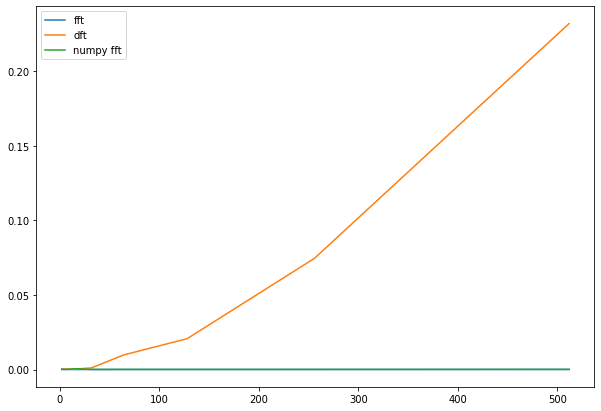

In [86]:
compare_fft_times()

## 2. DFT w 1D 

* Wygeneruj dwa sygnały czasowo-amplitudowe:

a) Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach

In [6]:
def signal_a(a=0, b=40):
    x = np.linspace(a, b, 10000)
    signals = [np.sin(x), np.sin(2*x), np.sin(3*x), np.sin(4*x), np.sin(5*x)]
    
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    for signal in signals:
        ax[0].plot(x, signal)
    
    sum_signal = np.sum(signals, axis=0)
    ax[1].plot(x, sum_signal)
    return x, sum_signal

In [87]:
x, signala = signal_a()

NameError: name 'signal_a' is not defined

b) Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie a), ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości

In [33]:
def signal_b(a=0, b=50):
    x = np.linspace(a, b, 10000)
    interval = len(x)//5
    
    signals = np.array([ np.sin(x[:interval]),  
               np.sin(2*x[interval:2*interval]),
               np.sin(3*x[2*interval:3*interval]),
               np.sin(4*x[3*interval:4*interval]),
               np.sin(5*x[4*interval:5*interval])])

    
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    for i, signal in enumerate(signals):
        ax[0].plot(x[i*interval:(i+1)*interval], signal)
        
    signal = signals.flatten()
    ax[1].plot(x, signal)
        
    return x, signal

(array([0.00000000e+00, 5.00050005e-03, 1.00010001e-02, ...,
        4.99899990e+01, 4.99949995e+01, 5.00000000e+01]),
 array([ 0.        ,  0.00500048,  0.01000083, ..., -0.98136047,
        -0.97624937, -0.97052802]))

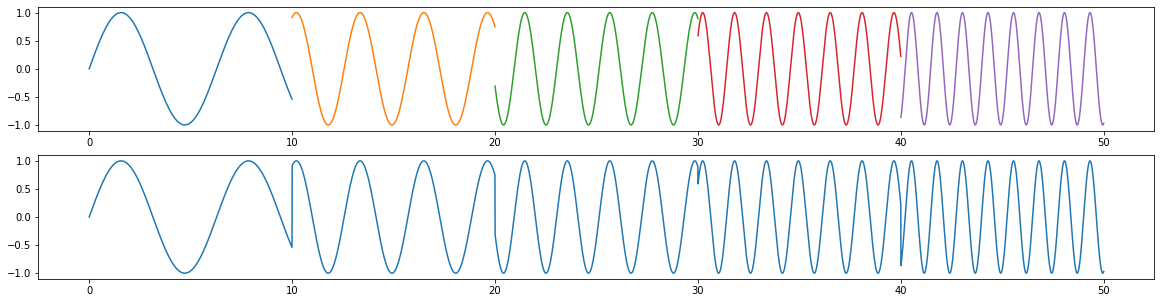

In [34]:
signal_b()

* Dokonaj transformacji sygnałów a) i b) do domeny częstotliwościowej, porównaj
otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część
urojoną wyniku transformacji.

wykresy i interpretacja, dlaczego to się tak zachowuje

## Wnioski